# Tasks for laboratory assignment 3

In [2]:
# imports section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures


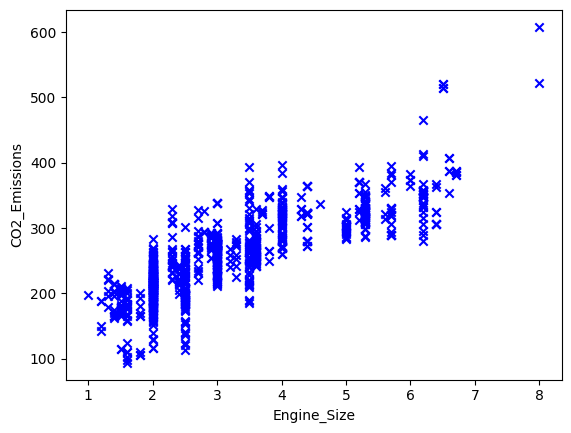

In [3]:
def build_plot(file_path, x, y):
    data = pd.read_csv(file_path)
    plt.scatter(data[x], data[y], c='blue', marker='x')
    plt.xlabel(x)
    plt.ylabel(y)
    return plt

build_plot('resources/CO2_emission.csv', 'Engine_Size', 'CO2_Emissions').show()


In [4]:
def extract_texts_from_file(file_path):
    return pd.read_csv(file_path, sep=",")

data = extract_texts_from_file('resources/heart.csv')
print(data[:50])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0    

## CO2 emissions

Process file `CO2_emission.csv`. Build a model, that would predict CO2 emissions from the size of the engine of car. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

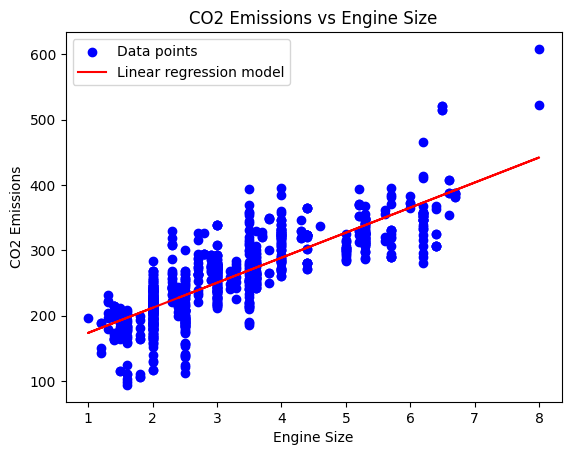

(array([38.32301106]), np.float64(135.3260546026322))

In [5]:
def CO2_emissions(data):
    # Extract features and target variable
    X = data[['Engine_Size']].values  # Engine size as feature
    y = data['CO2_Emissions'].values  # CO2 emissions as target

    # Create a Linear Regression model
    linear_model = LinearRegression()

    # Fit the model
    linear_model.fit(X, y)

    # Get the model parameters
    theta = linear_model.coef_, linear_model.intercept_

    # Predict using the model
    y_pred = linear_model.predict(X)

    # Plot the data points and the model's prediction
    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X, y_pred, color='red', label='Linear regression model')
    plt.xlabel('Engine Size')
    plt.ylabel('CO2 Emissions')
    plt.title('CO2 Emissions vs Engine Size')
    plt.legend()
    plt.show()

    return theta

data = extract_texts_from_file('resources/CO2_emission.csv')
CO2_emissions(data)

## Ice Cream Sales

Process file `ice_cream_selling_data.csv`. Build a model, that would predict ice cream sales based on the temperature. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

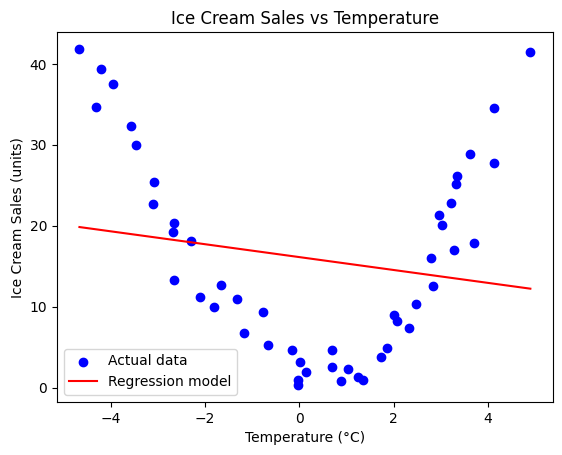

[np.float64(-0.7964571107159999), np.float64(16.121749391993667)]

In [6]:
def ice_cream_selling(data):
    # Extract features and target variable
    X = data[['Temperature (°C)']].values  # Temperature as feature
    y = data['Ice Cream Sales (units)'].values  # Ice Cream Sales as target

    # Create a Linear Regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(X, y)

    # Get the model parameters (slope and intercept)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Predict the ice cream sales using the model
    y_pred = model.predict(X)

    # Plot the original data points and the regression line
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', label='Regression model')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice Cream Sales (units)')
    plt.title('Ice Cream Sales vs Temperature')
    plt.legend()
    plt.show()

    return [slope, intercept]

data = extract_texts_from_file('resources/ice_cream_selling_data.csv')
ice_cream_selling(data)

## Electric Power Consumption

Process file `powerconsumption.csv`. Build a model, that would predict electricity consumption from the weather: temperature, humidity and wind speed. Visualize model on a plot.

Choose regression model that would best fit the data. Choose the library for model implementation (sklearn, other library, custom implementation).

Mean Squared Error: 40039336.85342752
R-squared: 0.20705370035102633


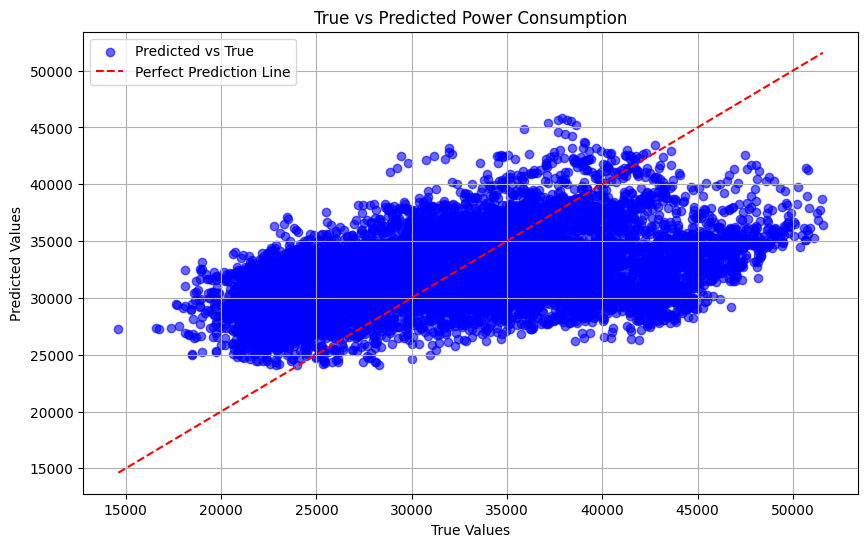

Model Intercept: 26205.744832837587
Model Coefficients: [ 508.35046111  -46.80647979 -124.07876728]


(np.float64(26205.744832837587),
 array([ 508.35046111,  -46.80647979, -124.07876728]))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


def power_consumption(data):
    # Step 1: Preprocessing
    # Convert datetime column if necessary (depending on the dataset's structure)
    if 'Datetime' in data.columns:
        data['Datetime'] = pd.to_datetime(data['Datetime'])

    # Step 2: Feature selection
    # We use Temperature, Humidity, WindSpeed as features
    X = data[['Temperature', 'Humidity', 'WindSpeed']]  # Features
    y = data['PowerConsumption_Zone1']  # Target (adjust based on your actual column)

    # Step 3: Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 5: Make predictions
    y_pred = model.predict(X_test)

    # Step 6: Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    
    # Visualize results: Plot true vs predicted power consumption
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs True')

    # Add line for perfect predictions
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Power Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return model parameters (intercept and coefficients)
    print(f"Model Intercept: {model.intercept_}")
    print(f"Model Coefficients: {model.coef_}")

    return model.intercept_, model.coef_

data = extract_texts_from_file('resources/powerconsumption.csv')
power_consumption(data)

## Heart Conditions Predictions

Process file `heart.csv`. It has the following data:

- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - Target variable - risk of heart attack - 1 is high chance of heart attack and 0 is low chance.

Use classification model (choose model best fitting model yourself). Choose parameters that would best fit for making a prediction on. Visualize model on a plot.

*Bonus points*: split data into train data and validation data. Validate your model.

Accuracy: 88.52%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



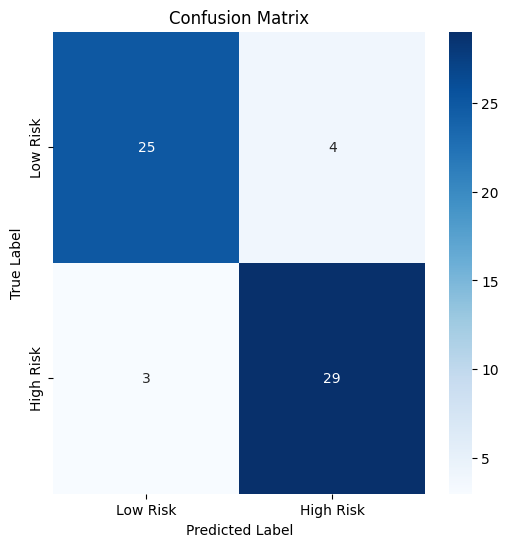

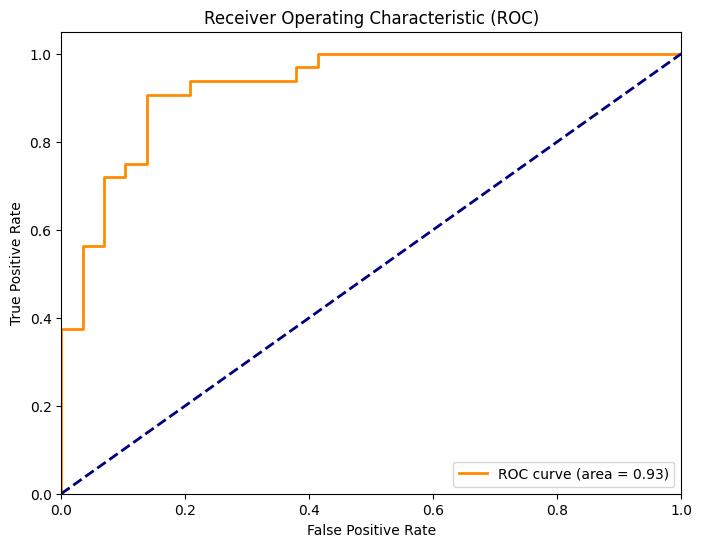

Model Intercept: [3.08198392]
Model Coefficients: [[-0.00707907 -1.4081956   0.79268033 -0.01596689 -0.0029244   0.16718629
   0.48033175  0.01879347 -0.94920971 -0.64735448  0.62963895 -0.7765248
  -0.91708215]]


(array([3.08198392]),
 array([[-0.00707907, -1.4081956 ,  0.79268033, -0.01596689, -0.0029244 ,
          0.16718629,  0.48033175,  0.01879347, -0.94920971, -0.64735448,
          0.62963895, -0.7765248 , -0.91708215]]))

In [12]:
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
import seaborn as sns

def heart_classification(data):
    # Define features and target variable
    X = data.drop('output', axis=1)  # Features (excluding the target)
    y = data['output']  # Target variable
    
    # Step 1: Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 2: Train a Logistic Regression model
    model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence if needed
    model.fit(X_train, y_train)

    # Step 3: Make predictions
    y_pred = model.predict(X_val)

    # Step 4: Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Print classification report
    print("\nClassification Report:\n", classification_report(y_val, y_pred))

    # Step 5: Confusion Matrix visualization
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Step 6: ROC Curve for model evaluation
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    # Return model parameters (intercept and coefficients)
    print(f"Model Intercept: {model.intercept_}")
    print(f"Model Coefficients: {model.coef_}")

    return model.intercept_, model.coef_

data = extract_texts_from_file('resources/heart.csv')
heart_classification(data)

## Additional (extra credit)

There are more files in the `resources` folder. Take a look at the. Visualize data in these files. Choose ML algorithm for building a model and making predictions for new data. Visualize the model.